<font color = 'blue'> <font size = 6> **Multilinear Regression -- Kings County Dataset**

# Getting Started

- Load dependencies
- Have a first look at our data

In [1]:
# Import dependancies

import pandas as pd 
import dtale
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from scipy.stats import kurtosis, skew
import scipy.stats as stats

from math import sqrt

import statsmodels.formula.api as smf

In [2]:
!pip install --upgrade dtale

Requirement already up-to-date: dtale in c:\users\mngav\appdata\local\continuum\anaconda3\envs\learn-env\lib\site-packages (1.7.8)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# read in to pandas the provided dataset

df = pd.read_csv("kc_house_data.csv")
# view first few observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
d = dtale.show(df)

In [5]:
d

In [6]:
d.kill()

Executing shutdown...


2020-02-23 18:56:12,617 - INFO     - Executing shutdown...


In [7]:
# deeper inspection of info in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


yr_renovated and date awill give us some trouble. In theory, it would be great to know if and when a home was renovated. However, this is a temporal feature and should not be used unless time is the underlying feature for the entire analysis. Since it is not, we will remove it.

- drop yr_renovated
- drop id; an internal tracking convention we have no use for
- change `data` to `date_sold` ; more descriptive


In [9]:
# drop id column
df.drop(columns = ['id','yr_renovated','date'], inplace = True)
# rename date to date_sold
#df = df.rename({'date':'date_sold'}, axis = 1)  

yr_renovated will give us some trouble.  In theory, it would be great to know if and when a home was renovated.  However, this is a temporal feature and should not be used unless time is the underlying feature for the entire analysis.  Since it is not, we will remove it. 

# Data Scrub

- look for missing values
    - impute
    - drop observations / features
- fix data types 

## Look for and deal with missing values

In [10]:
# sum missing values by each feature
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Inspect features with NaN values, starting with **Waterfront**

In [11]:
df.waterfront.unique()

array([nan,  0.,  1.])

values are binary for yes or no.  Lets look at the frequency for each to get an idea of the distribution

In [12]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

11% of values in waterfront are NaN so I'd like to keep the records.  Over 99% of the homes we know about do not have a waterfront.  I think its safe enough to impute the missing values with a zero for not having waterfront. 

In [13]:
# fill na values with a zero
df.waterfront = df.waterfront.fillna(0)

Repeat the review process for the **view** dimension

In [14]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

The view column ranks the quiality fron zero to four
There are only 63 observations missing values, i.e., 0.33 percent, I'll drop the rows missing values

In [15]:
df = df.dropna(subset = ["view"])

In [16]:
# df.yr_renovated = df.yr_renovated.fillna(0)

In [17]:
# make sure all missing values have been dealt with 
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Repeat the review process for the **view** dimension

Looking good, lets move on scrubbing data types

## Review data types

- price
- waterfront
- view
- sqft_basement
- yr_renovated

In [18]:
print(f"df shape is: {df.shape}")
print()
print(df.info())

df shape is: (21534, 18)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 18 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.1+ MB
None


review **price**

In [19]:
# look at a random slice; are these integers or floats?
df.price[200:300]

203     226500.0
204     274250.0
206     677900.0
207     425000.0
208     180250.0
209     464000.0
210     320000.0
211     625504.0
212     592500.0
213     465000.0
214     477000.0
215     280000.0
216    1510000.0
217     445838.0
218    1070000.0
219     467000.0
220     686000.0
221     279950.0
222     527000.0
223     325000.0
224     328000.0
225     390000.0
226     479950.0
227     264950.0
228     235000.0
229     516500.0
230     655000.0
231     500000.0
232     315000.0
233     213000.0
         ...    
274     331000.0
275     365000.0
276     450000.0
277     770000.0
278     455000.0
279     405000.0
280     304900.0
281     170000.0
282    2050000.0
283     780000.0
284     330000.0
285     370000.0
286     467000.0
287     405000.0
288     675000.0
289     500000.0
290     389999.0
291     630000.0
292     360000.0
293     580000.0
294     550000.0
295     879000.0
296     265000.0
297     446500.0
298     404000.0
299     267500.0
300    3080000.0
301     335000

these are integers, not floats

In [20]:
# change price column to int
df.price = df.price.astype("int64")

In [21]:
df.price = df.price.astype("int64")

review **waterfront**

In [22]:
df.waterfront.unique()

array([0., 1.])

waterfront will become a category type later but for now will coerce to int

In [23]:
df.waterfront = df.waterfront.astype("int64")

review **view**

In [24]:
df.view.unique()

array([0., 3., 4., 2., 1.])

view will become a category type later but for now will coerce to int.

In [25]:
df.view = df.view.astype("int64")

review **sqft_basement**

In [26]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

sqft_basement is listed as an object right now because it has question mark values.

In [27]:
# how many question marks (?) are there in the column?
df.sqft_basement.str.count('\?').sum()

452

Should we impute or remove observations with the question mark?  
452 records is only 2% of the data.  Lets look at what portion of the data have a basement or not.

In [28]:
import copy
no_bsmt = copy.deepcopy(df[df.sqft_basement =='0.0'])
print(f"there are {len(no_bsmt)} homes with no basement ")

there are 12798 homes with no basement 


60% of the homes on our dataset do not have a basement; lets impute the missing values with a zero.

In [29]:
# replace ? with 0
df.sqft_basement = df.sqft_basement.replace("?", 0)

In [30]:
# python does not allow changing a str to an int so we must change to a float first
df.sqft_basement = df.sqft_basement.astype("float64")
df.sqft_basement = df.sqft_basement.astype("int64")

review **yr_renovated**

In [32]:
# a year is clearly an integer
#df.yr_renovated = df.yr_renovated.astype("int64")

save the cleaned dataset in case we need it later

In [ ]:
df.to_csv("cleaned_kc_housing_data.csv")

<font color = 'red'><font size = 5>***END DATA SCRUB***

# EDA

## look for multicolinearity

Multicolinearity = predictors that are correlated with each other; some features are redundant.  

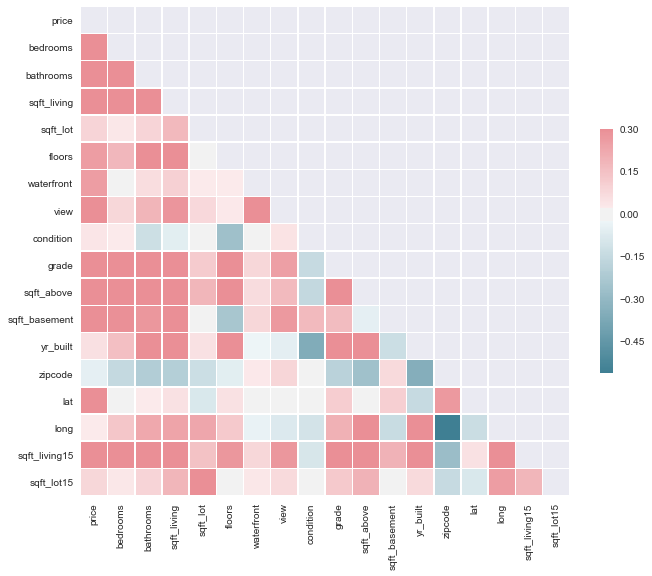

In [33]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# compute the correlation matrix
corr = df.corr()
# create a mask object for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# set up the matplotlib figure and axis
fig, ax = plt.subplots(figsize = (11,9))
# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap= True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 0.3, center = 0, square= True, linewidths= 0.5, cbar_kws={"shrink": 0.5})

In [34]:
# view the correlation matrix in numeric form
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.319082,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.296548,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.277583,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.427422,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015097,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.242348,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.080917,-0.025000,0.029490,-0.012282,-0.037845,0.082352,0.030605
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.167889,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.164272,0.448255,-0.185710,0.113787,0.200821,0.713462,0.121435


In [35]:
most_corr = copy.deepcopy(df)
most_corr = most_corr.corr().abs()
most_corr = most_corr.unstack()
most_corr = most_corr.sort_values(kind='quicksort', ascending=False)
print(type(most_corr))
display(most_corr)

<class 'pandas.core.series.Series'>


sqft_lot15     sqft_lot15       1.000000
condition      condition        1.000000
lat            lat              1.000000
zipcode        zipcode          1.000000
yr_built       yr_built         1.000000
sqft_basement  sqft_basement    1.000000
sqft_above     sqft_above       1.000000
grade          grade            1.000000
view           view             1.000000
sqft_living15  sqft_living15    1.000000
waterfront     waterfront       1.000000
floors         floors           1.000000
sqft_lot       sqft_lot         1.000000
sqft_living    sqft_living      1.000000
bathrooms      bathrooms        1.000000
bedrooms       bedrooms         1.000000
long           long             1.000000
price          price            1.000000
sqft_living    sqft_above       0.876553
sqft_above     sqft_living      0.876553
grade          sqft_living      0.762398
sqft_living    grade            0.762398
sqft_living15  sqft_living      0.756208
sqft_living    sqft_living15    0.756208
grade          s

## Confirm Assumptions for Linear Regression

- normal distribution in data
- homoscedasticity

look for outliers in categorical features

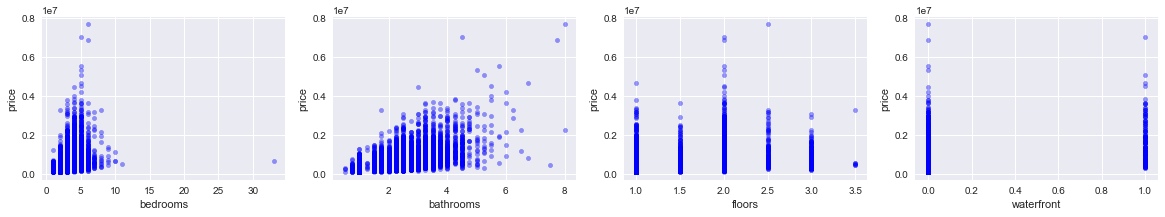

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

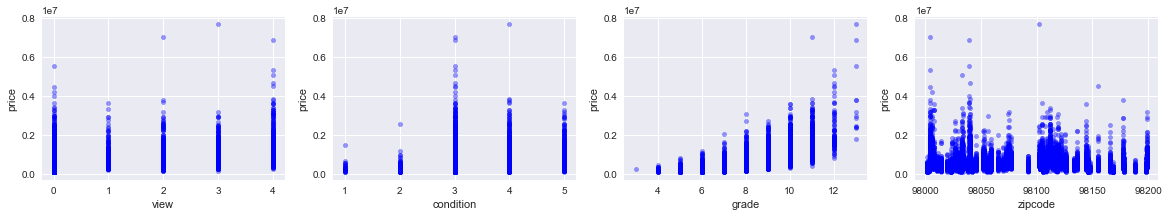

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

remove outliers:
- bedrooms
- bathrooms

In [38]:
df = df[df.bedrooms < 10]
df = df[df.bathrooms < 5]

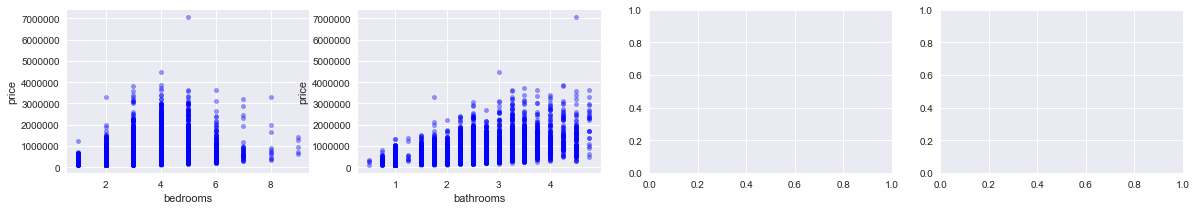

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

plot distributions of continuous features

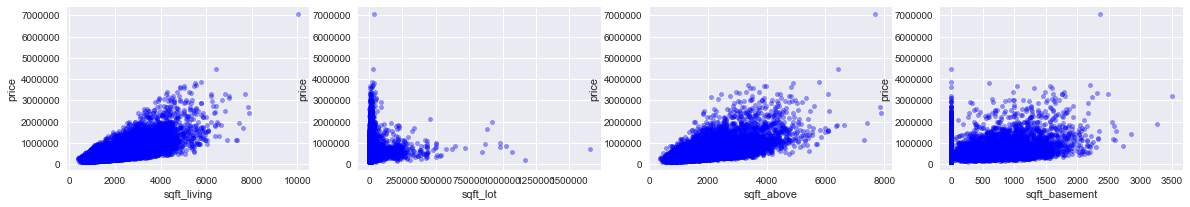

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

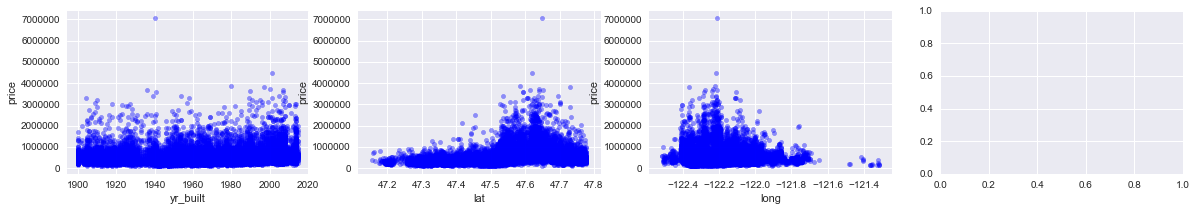

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'yr_built',  'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

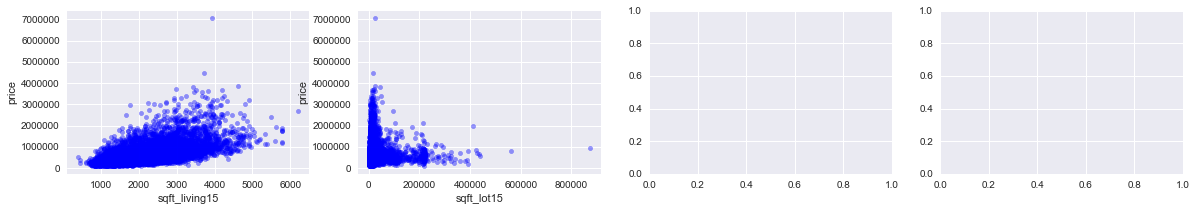

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

remove outliers

In [43]:
df = df[df.sqft_living < 6000]
df = df[df.sqft_lot < 300000]
df = df[df.sqft_above < 6000]
df = df[df.sqft_basement < 2000]
df = df[df.sqft_living15 < 5000]
df = df[df.sqft_lot15 < 300000]

C:\Users\mngav\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



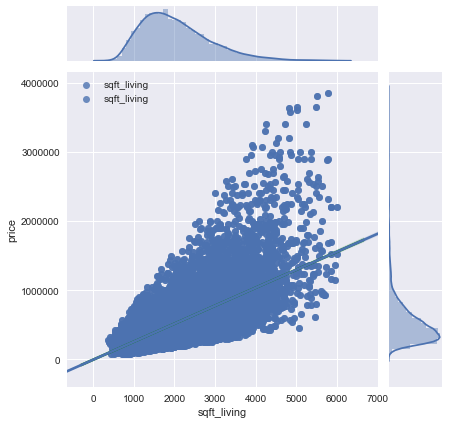

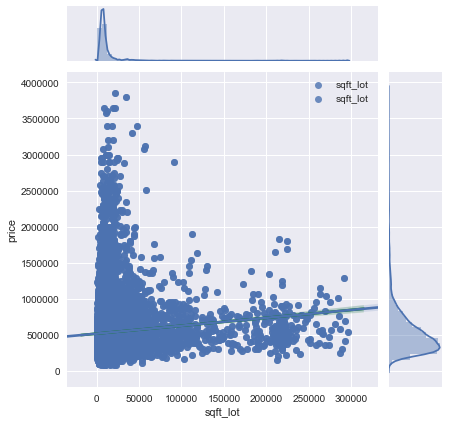

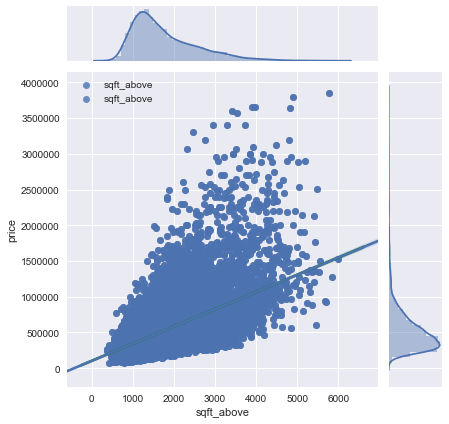

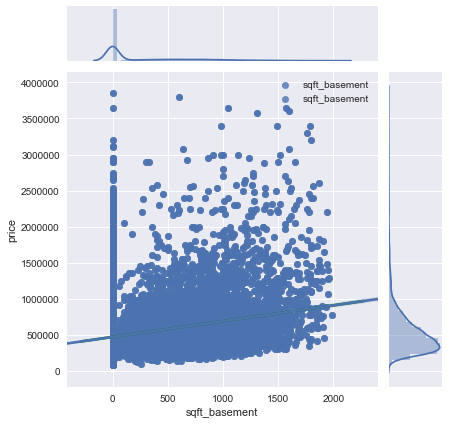

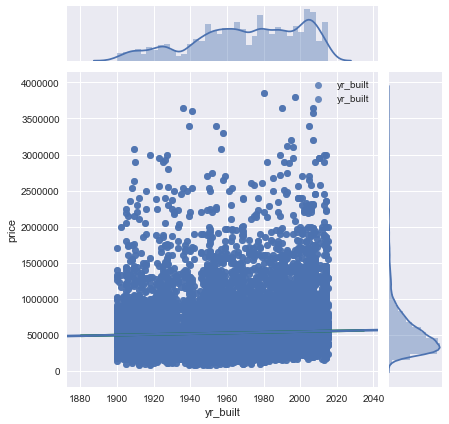

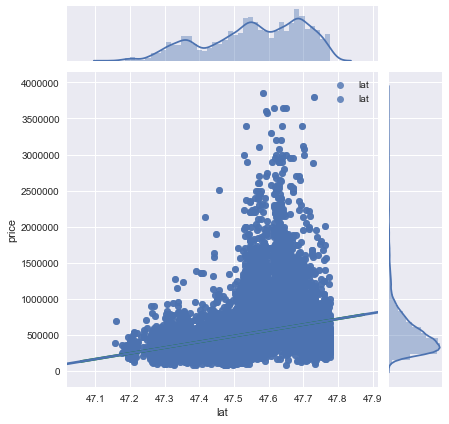

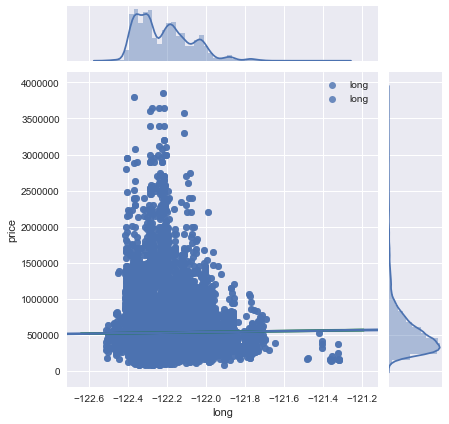

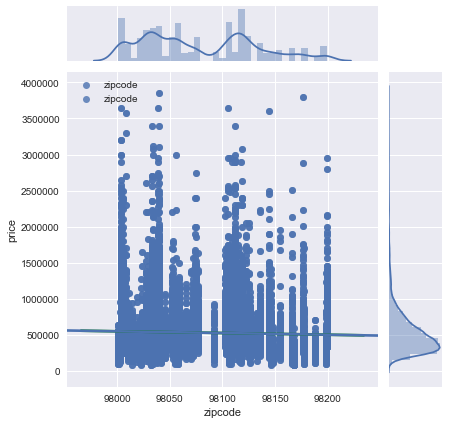

In [44]:
# joint plots for continuous

for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built',  'lat', 'long', 'zipcode']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

C:\Users\mngav\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



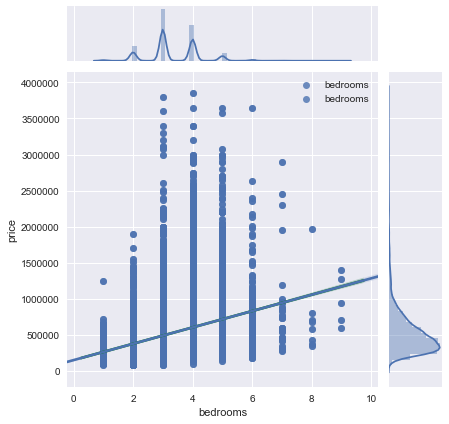

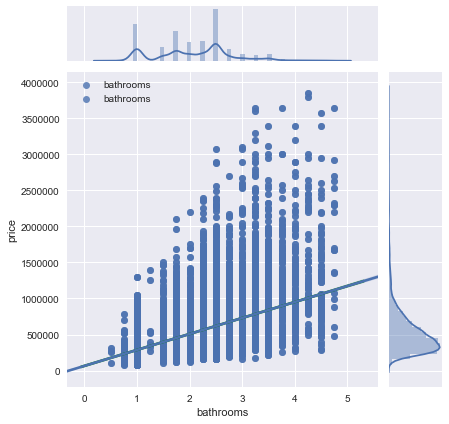

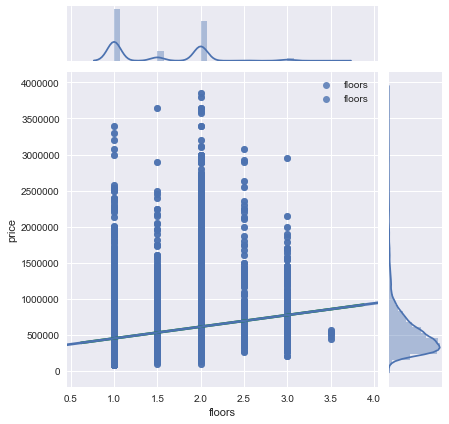

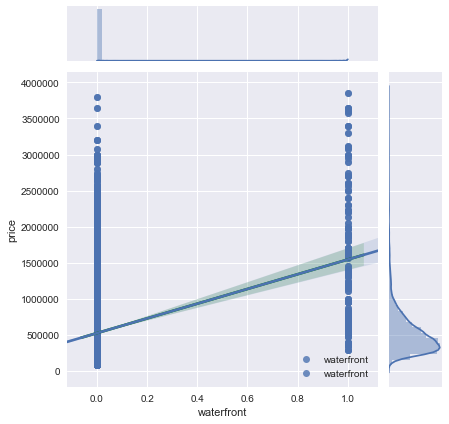

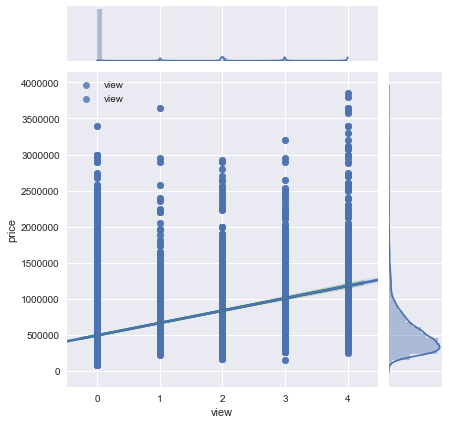

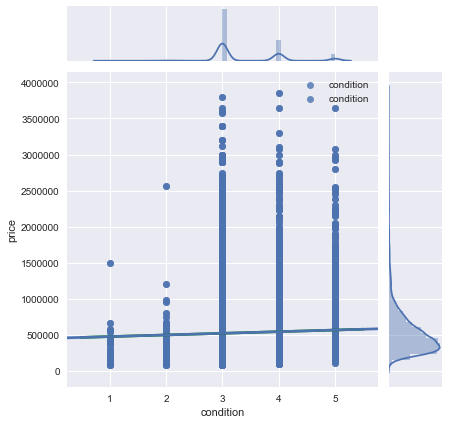

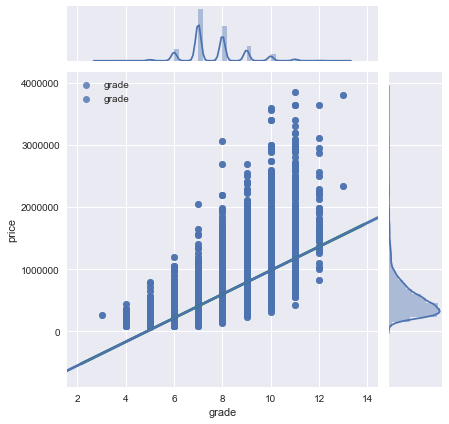

In [45]:
# joint plots for categoricals

for column in ['bedrooms', 'bathrooms', 'floors', 'waterfront','view', 'condition', 'grade']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

take log of continuous features to see if we can normalize

In [46]:
data_log = pd.DataFrame([])

data_log["price"] = np.log(df["price"])
data_log["sqft_living"] = np.log(df["sqft_living"])
data_log["sqft_lot"] = np.log(df["sqft_lot"])
data_log["sqft_above"] = np.log(df["sqft_above"])
# data_log["sqft_basement"] = np.log(df["sqft_basement"]) # sqft_basement has many zeros; cannot take log
data_log["sqft_living15"] = np.log(df["sqft_living15"])
data_log["sqft_lot15"] = np.log(df["sqft_lot15"])

C:\Users\mngav\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



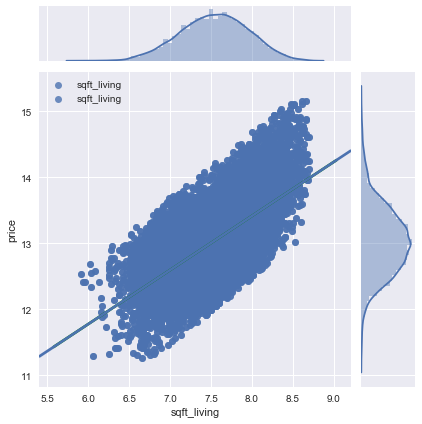

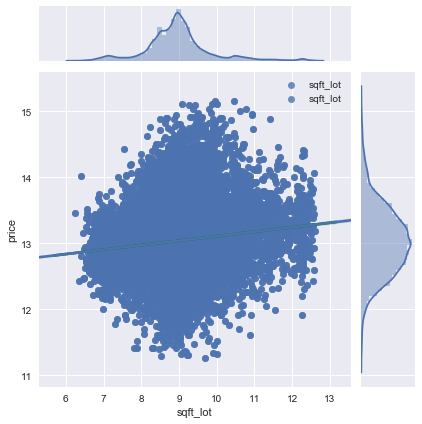

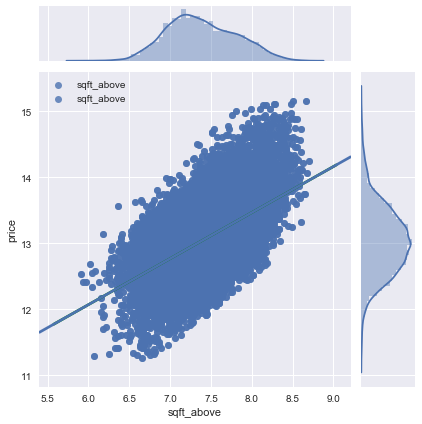

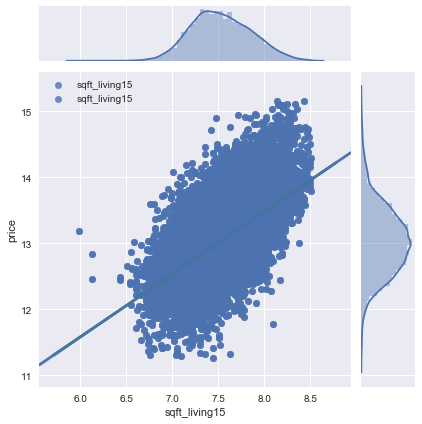

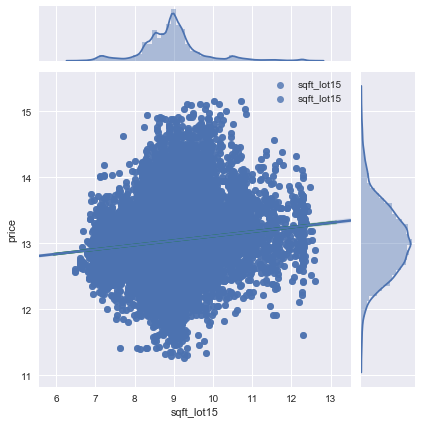

In [47]:
#plot log transformed continuous variables

for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'
              ]:
    sns.jointplot(x=column, y="price",
                  data=data_log, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(data_log[column], data_log.price, label=column)
    plt.legend()
    plt.show()

# Baseline Model

In [48]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650


one-hot-encode categorical features

In [49]:
# instantiate list for categorical features
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront','view', 'condition', 'grade']
# using pandas get_dummies
data = pd.get_dummies(df, columns = categoricals)
data.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900,1180,5650,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,538000,2570,7242,2170,400,1951,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,180000,770,10000,770,0,1933,98028,47.7379,-122.233,2720,8062,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000,1960,5000,1050,910,1965,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,510000,1680,8080,1680,0,1987,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
# separate X and y varaibles
y_target = copy.deepcopy(data.price)
X_features = copy.deepcopy(data.drop(columns= 'price'))
# separate data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.33, random_state=42)

In [51]:
print(X_test.shape)
print(y_test.shape)
print(type(y_test))
print(y_test.ndim)

(7024, 66)
(7024,)
<class 'pandas.core.series.Series'>
1


In [52]:
X_features.head(1)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1180,5650,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create linear regression object
linReg = LinearRegression()
#train the model with training sets
linReg.fit(X_train, y_train)
# make predictions on test set
preds = linReg.predict(X_test)

In [54]:
#print('Coefficients: \n', linReg.coef_)
#print()
print('Mean squared error: %.2f' % mean_squared_error(y_test, preds))
print()
print('Coeficient of determination r2: %.2f' % r2_score(y_test, preds))

Mean squared error: 30590089846.36

Coeficient of determination r2: 0.72


# Model 2

lets run another model after removing features with high colinearity and those that do not form normal distributions

In [55]:
model_2 = copy.deepcopy(df)
model_2.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650


In [56]:
model_2 = model_2.drop(columns=[ 'sqft_above', 'sqft_living15', 'sqft_lot15', 'waterfront', 'condition', 
                               'sqft_lot', 'lat', 'long'])


In [57]:
y_target_2 = model_2.price
X_features_2 = model_2.drop(columns= 'price')
# separate data into training and validation sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_features_2, y_target_2, test_size=0.33, random_state=42)

In [58]:

# create linear regression object
linReg_2 = LinearRegression()
#train the model with training sets
linReg_2.fit(X_train2, y_train2)
# make predictions on test set
preds_2 = linReg_2.predict(X_test2)

print('Mean squared error: %.2f' % mean_squared_error(y_test2, preds_2))
print()
print('Coeficient of determination r2: %.2f' % r2_score(y_test2, preds_2))

Mean squared error: 40677311591.34

Coeficient of determination r2: 0.62


# Conclusion

Model 1 performed best with a coefficient of determination of 0.72 meaning, 72% of the variability in price is explained by all the features (predictors) present in that model. 